# Kaggle Competiton | BNP Paribas Cardif Claims Management

>As a global specialist in personal insurance, BNP Paribas Cardif serves 90 million clients in 36 countries across Europe, Asia and Latin America.
>In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.
>In this challenge, BNP Paribas Cardif is providing an anonymized database with two categories of claims:
>1. claims for which approval could be accelerated leading to faster payments
>2. claims for which additional information is required before approval

>Kagglers are challenged to predict the category of a claim based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

Go to the official page of the [Kaggle Competition.](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management)

### Goal for this Notebook:
In the case of this competition, we do not have previous information about the data and the different features. Therefore, in this notebook we will:
* Explore the format of data given and the format expected for the submission
* Explore the different data types in the features and when continous, if they follow a normal distribution or not
* Explore whether or not there are missing values
* Explore how to preprocess the data for a later prediction

### Required Libraries
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Sklearn
* Scipy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from scipy import stats

%matplotlib inline

/usr/local/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


### Handling Data
###### 1. Upload the data from the Kaggle Competition and check it out

In [3]:
train = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/train.csv")
test = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/test.csv")
sample = pd.read_csv("../../../github_data/bnp_paribas_cardif_data/sample_submission.csv")

In [4]:
sample.head()

,ID,PredictedProb
0,0,0.5
1,1,0.5
2,2,0.5
3,7,0.5
4,10,0.5


In [5]:
train.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [6]:
test.head()

,ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,...,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,...,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
3,7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,...,4.404040,8.163614,1.100329e+00,B,1.988688,1.558753,2.448814,0,5.385474,1.493777e+00
4,10,1.252822e+00,11.283352,C,4.638388,8.52051,2.302484,3.510159,0.074263,7.612904,...,6.580644,1.325654,2.584588e-01,A,1.863796,2.666478,2.374275,0,0.681672,2.264151e+00


There are missing values that need to be replaced.

It looks like there are continous features but also categorical.

###### 2. Explore Data Type by plotting and Preprocess it for later Analysis

In [7]:
trainclean = train.fillna(0)
trainclean.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,0.000000,0.000000,C,0.000000,9.191265,0.000000,0.000000,2.301630,...,0.000000,0.000000,0.598896,AF,0.000000,0.000000,1.957825,0,0.000000,0.000000
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,0.000000,0.000000,C,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,Z,0.000000,0.000000,0.000000,0,0.000000,0.000000


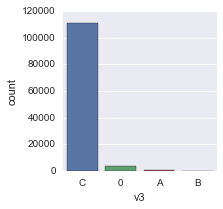

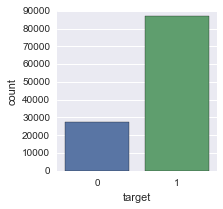

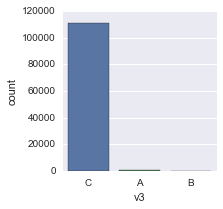

In [8]:
sns.factorplot('v3',data=trainclean,kind='count',size=3)
sns.factorplot('target',data=train,kind='count',size=3)
sns.factorplot('v3',data=train,kind='count',size=3)

   ######                   2.1. Explore Float Continous Data

In [9]:
train.loc[:, train.dtypes == np.float64].head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v120,v121,v122,v123,v124,v126,v127,v128,v130,v131
0,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,...,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0.636365,2.857144
1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,...,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,NaN,NaN
2,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,...,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,0.883118,1.176472
3,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,...,1.166281,1.956521,7.018256,1.812795,0.002267,1.415230,2.954381,1.990847,1.677108,1.034483
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.050328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Does it containt Nan Values?

In [10]:
train.loc[:, train.dtypes == np.float64].isnull().sum().sum()

4967293

If I want to replace NaN values I need to know if my data is normal distributed or not.

* Which type of distribution follows my data?

In [ ]:
# Evaluate if normal distributed data or not by the Shapiro test
dist = {}
# Normalize data for each column
columns = train.columns[(train.dtypes == np.float64)]
for i in range(len(columns)):
    train.update(train[columns[i]].notnull().apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna())
    # check if normal distribution
    hyp = stats.shapiro(train[columns[i]])
    # if p-value < 0.05 is not normally distributed
    if hyp[1] < 0.05:
        dist[i] = "nonnormal"
    else:
        dist[i] = "normal"
print(dist)

Since the continous features follow a normal distribution we can replace NaN values by the mean or the median for the prediction but in this case let's use the median.

In [ ]:
# substitute in float data NaN by median value 
# save values into a numpy array(n_samples,n_features)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp.fit(train.loc[:, train.dtypes == np.float64])
X = train.loc[:, train.dtypes == np.float64]
floatFeatures = pd.DataFrame(imp.transform(X))
floatFeatures.head()

In [ ]:
# plot a couple of features to see the distribution they follow once the median is applied to NaN
contdata2 = floatFeatures.apply(lambda x: (x - x.mean()) / (x.max() - x.min())).dropna()
f, ax = plt.subplots(2, sharex=True, figsize=(10,8))
sns.distplot(contdata2[0], bins=25, kde=False, rug=True, ax=ax[0])
sns.distplot(contdata2[15], bins=25, kde=False, rug=True, ax=ax[1])
#sns.distplot(contdata2[29], bins=25, kde=False, rug=True, ax=ax[2])
#sns.distplot(contdata2[39], bins=25, kde=False, rug=True, ax=ax[3])
#sns.distplot(contdata2[51], bins=25, kde=False, rug=True, ax=ax[4])
#sns.distplot(contdata2[63], bins=25, kde=False, rug=True, ax=ax[5])
#sns.distplot(contdata2[74], bins=25, kde=False, rug=True, ax=ax[6])
#sns.distplot(contdata2[89], bins=25, kde=False, rug=True, ax=ax[7])
#sns.distplot(contdata2[107], bins=25, kde=False, rug=True, ax=ax[8])

###### 2.2. Explore Integers Categorical Data

In [11]:
train.loc[:, train.dtypes == np.int].head()

,ID,target,v38,v62,v72,v129
0,3,1,0,1,1,0
1,4,1,0,2,2,0
2,5,1,0,1,3,2
3,6,1,0,1,2,1
4,8,1,0,1,1,0


In this case, since there are not NaN values, we do need to choose a replacement.

In [12]:
# Do I have NaN values?
train.loc[:, train.dtypes == np.int].isnull().sum().sum()

0

Let's have a look to the categorical features.

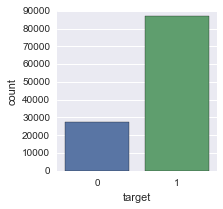

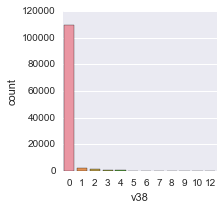

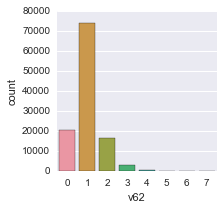

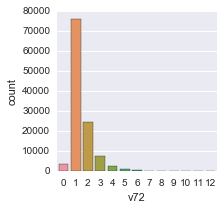

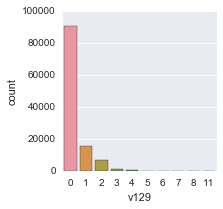

In [13]:
sns.factorplot('target',data=train,kind='count',size=3)
sns.factorplot('v38',data=train,kind='count',size=3)
sns.factorplot('v62',data=train,kind='count',size=3)
sns.factorplot('v72',data=train,kind='count',size=3)
sns.factorplot('v129',data=train,kind='count',size=3)

* Convert Each Category into a new Boolean Feature for further Analysis

In [ ]:
enc = preprocessing.OneHotEncoder()
columns = train.columns[(train.dtypes == np.int)]
# exclude first column of IDs
enc = enc.fit(train.loc[:, columns[2:]])
enc.feature_indices_

In [ ]:
enc.n_values_

In [ ]:
columns

In [ ]:
train.loc[:, columns[0]].unique()

In [ ]:
train.loc[:, columns[2:]].head()

In [ ]:
x = enc.transform(train.loc[:, columns[2:]]).toarray()
intFeatures = pd.DataFrame(x)
intFeatures.head()

###### 2.3. Explore Objects Categorical Data

In [14]:
train.loc[:, train.dtypes == np.object].head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


In [ ]:
sns.factorplot('v3',data=train,kind='count',size=3)
sns.factorplot('v22',data=train,kind='count',size=3)
sns.factorplot('v24',data=train,kind='count',size=3)
sns.factorplot('v30',data=train,kind='count',size=3)
sns.factorplot('v31',data=train,kind='count',size=3)
sns.factorplot('v47',data=train,kind='count',size=3)
sns.factorplot('v52',data=train,kind='count',size=3)
sns.factorplot('v56',data=train,kind='count',size=3)
sns.factorplot('v66',data=train,kind='count',size=3)
sns.factorplot('v71',data=train,kind='count',size=3)
sns.factorplot('v74',data=train,kind='count',size=3)
sns.factorplot('v75',data=train,kind='count',size=3)
sns.factorplot('v79',data=train,kind='count',size=3)
sns.factorplot('v91',data=train,kind='count',size=3)
sns.factorplot('v107',data=train,kind='count',size=3)
sns.factorplot('v110',data=train,kind='count',size=3)
sns.factorplot('v112',data=train,kind='count',size=3)
sns.factorplot('v113',data=train,kind='count',size=3)
sns.factorplot('v125',data=train,kind='count',size=3)

In this case there are NaN values within the categorical data. They will be replaced by the most frequent category in each of the features.

In [16]:
# Do I have NaN values?
train.loc[:, train.dtypes == np.object].isnull().sum().sum()

130178

However, first we need to replace string categories by integer categories in order to use Imputer.

In [19]:
# change np.object into np.categorical
columns = train.columns[(train.dtypes == np.object)]  
for i in range(len(columns)):
    # convert to categorical
    train[columns[i]] = train[columns[i]].astype('category')
    # convert to integers (NaN == -1)
    train[columns[i]] = train[columns[i]].cat.codes

In [21]:
# Third substitute in float data NaN by mean value 
imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
imp.fit(train[columns[:]])
X = train[columns[:]]
X.head()

,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,16670,2,2,0,2,6,85,2,4,1,3,4,0,4,1,14,-1,21
1,7733,2,2,0,4,6,101,0,4,1,3,3,1,1,0,20,17,6
2,7086,4,-1,0,2,5,17,0,1,1,1,4,6,2,1,18,-1,5
3,1510,3,2,1,2,7,47,0,4,1,3,1,1,1,1,9,-1,64
4,8037,4,-1,0,8,7,-1,2,4,1,3,2,6,2,0,19,17,89


In [22]:
objpreFeatures = pd.DataFrame(imp.transform(X))
objpreFeatures.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,16670.0,2.0,2.0,0.0,2.0,6.0,85.0,2.0,4.0,1.0,3.0,4.0,0.0,4.0,1.0,14.0,17.0,21.0
1,7733.0,2.0,2.0,0.0,4.0,6.0,101.0,0.0,4.0,1.0,3.0,3.0,1.0,1.0,0.0,20.0,17.0,6.0
2,7086.0,4.0,2.0,0.0,2.0,5.0,17.0,0.0,1.0,1.0,1.0,4.0,6.0,2.0,1.0,18.0,17.0,5.0
3,1510.0,3.0,2.0,1.0,2.0,7.0,47.0,0.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,9.0,17.0,64.0
4,8037.0,4.0,2.0,0.0,8.0,7.0,47.0,2.0,4.0,1.0,3.0,2.0,6.0,2.0,0.0,19.0,17.0,89.0


* Convert Each Category into a new Boolean Feature for further Analysis

In [23]:
enc = preprocessing.OneHotEncoder()
enc = enc.fit(objpreFeatures)
x = enc.transform(objpreFeatures).toarray()
x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
intFeatures = pd.DataFrame(x)
intFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,18561,18562,18563,18564,18565,18566,18567,18568,18569,18570
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The next steps will be detailed in the notebook gen_pipeline.ipynb where each of the steps of the pipeline for our prediction will be explored.